In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

The data we read below is 5000 scenarios and problem formulation 0 (most aggregated kpis)

In [2]:
experiments = pd.read_csv("data/scenarios_numevents.csv").drop(columns = 'Unnamed: 0')
outcomes = pd.read_csv("data/outcomes_numevents.csv").drop(columns = 'Unnamed: 0')

In [3]:
experiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   A.0_ID flood wave shape  5000 non-null   float64
 1   A.1_Bmax                 5000 non-null   float64
 2   A.1_Brate                5000 non-null   float64
 3   A.1_pfail                5000 non-null   float64
 4   A.2_Bmax                 5000 non-null   float64
 5   A.2_Brate                5000 non-null   float64
 6   A.2_pfail                5000 non-null   float64
 7   A.3_Bmax                 5000 non-null   float64
 8   A.3_Brate                5000 non-null   float64
 9   A.3_pfail                5000 non-null   float64
 10  A.4_Bmax                 5000 non-null   float64
 11  A.4_Brate                5000 non-null   float64
 12  A.4_pfail                5000 non-null   float64
 13  A.5_Bmax                 5000 non-null   float64
 14  A.5_Brate               

In [4]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,119.0,196.280235,1.5,0.765275,280.850202,10.0,0.819159,90.437560,10.0,0.443867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
1,0.0,236.448477,1.5,0.266018,41.320976,1.0,0.987091,262.759038,10.0,0.571843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Policy 0,dikesnet
2,78.0,271.543826,1.0,0.010454,81.850986,1.0,0.123627,309.680838,1.5,0.340657,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,66.0,306.283921,1.5,0.499950,340.886794,1.0,0.853867,301.387909,10.0,0.348747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,48.0,104.949207,1.0,0.493286,196.669320,1.0,0.835598,209.219757,10.0,0.146092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet


In [5]:
experiments.scenario

0          0
1          1
2          2
3          3
4          4
        ... 
4995    4995
4996    4996
4997    4997
4998    4998
4999    4999
Name: scenario, Length: 5000, dtype: int64

In [6]:
outcomes.head()

,All Costs,Expected Number of Deaths
0,4.199172e+08,1.330754
1,1.096573e+09,1.907209
2,1.161058e+09,1.911908
3,2.303040e+08,0.871864
4,6.934405e+08,2.952945


In [7]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   All Costs                  5000 non-null   float64
 1   Expected Number of Deaths  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [8]:
outcomes.columns

Index(['All Costs', 'Expected Number of Deaths'], dtype='object')

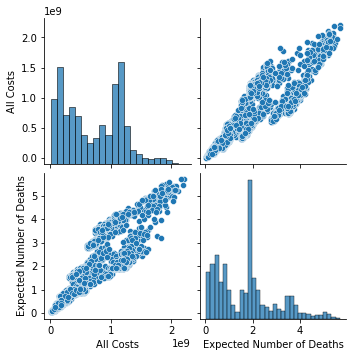

In [9]:
sns.pairplot(outcomes)
plt.show()

- High correlation between the two KPIs 
- Some spikes in the histograms

In [10]:
outcomes.corr()

,All Costs,Expected Number of Deaths
All Costs,1.000000,0.828361
Expected Number of Deaths,0.828361,1.000000


Deaths and costs super correlated in a diamond manner :) Note that costs here are only the damage because there is no investment (RfR, dike heightening...) in this scenario discovery runs

In [11]:
outcomes_classified = outcomes['All Costs'] > np.quantile(outcomes['All Costs'], 0.90)

Worst ten percent (in terms of damage (costs)) classified for prim

In [12]:
outcomes_classified

0       False
1       False
2       False
3       False
4       False
        ...  
4995     True
4996    False
4997    False
4998    False
4999    False
Name: All Costs, Length: 5000, dtype: bool

In [13]:
from ema_workbench.analysis import prim
from ema_workbench import MultiprocessingEvaluator, ema_logging

ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(experiments, outcomes_classified, threshold=0.80)
box1 = prim_alg.find_box()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 5000 points remaining, containing 500 cases of interest
[MainProcess/INFO] mean: 0.8725868725868726, mass: 0.0518, coverage: 0.452, density: 0.8725868725868726 restricted_dimensions: 4


In [14]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

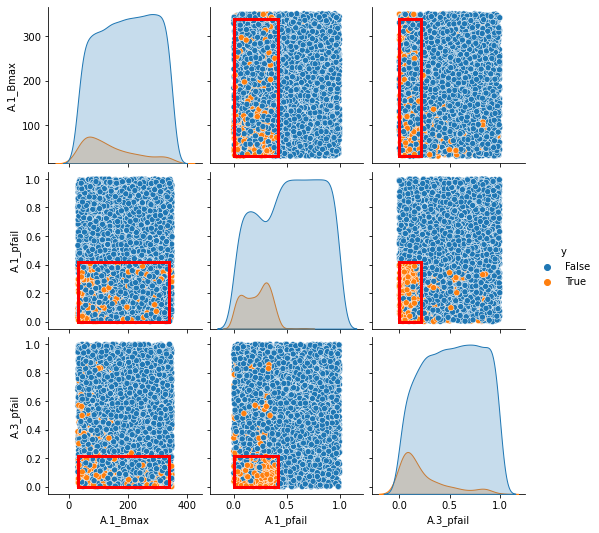

In [16]:
box1.select(47)
fig = box1.show_pairs_scatter()
#plt.title('Selected PRIM box with three restricted dimensions', y=3)
plt.show()

The box shows that by restricting the variables A.1_pfail, A.3_pfail and A.1_Bmax it is possible to differentiate highly problematic scenarios. This analysis suggests that the uncertainty of these three variables may have significant impact on how the KPIs turn out to be. This insight will be investigated in global sensitivity analysis methods (Sobol and Extra trees)

An illustration of the impact of A.1_pfail and A.3_pfail on total costs (flood caused damage) KPI:

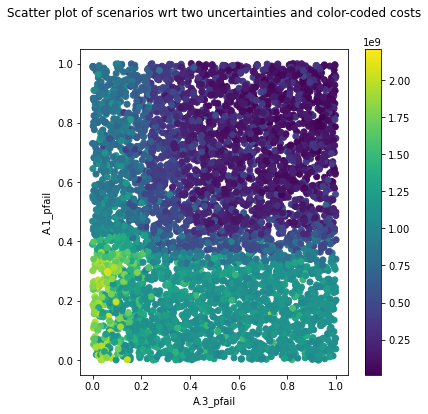

In [17]:
fig, ax = plt.subplots(figsize=(6,6))

m = ax.scatter(experiments["A.3_pfail"], experiments["A.1_pfail"], c=outcomes['All Costs'])
ax.set_xlabel("A.3_pfail")
ax.set_ylabel("A.1_pfail")
fig.colorbar(m)

plt.title('Scatter plot of scenarios wrt two uncertainties and color-coded costs', y=1.08)

plt.show()


Although not intuitive semantically, it was identified (by referring to the course guide) that the pfail variables represent the strgenth of dikes. With this in mind, it makes sense to get a region of high damage when both of the parameters get their lowest possible value.;

Let's see the worst damage scenario as a baseline for optimization:

In [18]:
experiments["All Costs"] = outcomes["All Costs"]

In [19]:
experiments.sort_values(by = "All Costs", ascending = False).head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,policy,model,All Costs
669,8.0,279.927319,1.5,0.325451,68.693638,1.5,0.031606,139.495343,1.5,0.061035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,2.211887e+09
2823,115.0,37.469968,1.0,0.249204,247.918427,1.5,0.126649,174.778116,1.0,0.014625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,2.186321e+09
3197,127.0,322.612287,1.0,0.298354,102.219555,1.0,0.028959,306.646021,10.0,0.061943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,2.158307e+09
1739,121.0,79.139680,1.0,0.330588,163.675469,1.5,0.969182,40.389039,1.0,0.156621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,2.100982e+09
2502,17.0,77.784894,1.5,0.342628,139.763986,1.5,0.028388,274.764781,10.0,0.057482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Policy 0,dikesnet,2.079301e+09


Scenario with the index 669 is the worst case scenario wrt All Costs KPI.

In [20]:
outcomes.sort_values(by = "Expected Number of Deaths", ascending = False).head()

,All Costs,Expected Number of Deaths
669,2.211887e+09,5.691926
3197,2.158307e+09,5.688582
3901,1.966782e+09,5.580170
1289,1.907377e+09,5.476975
2823,2.186321e+09,5.444103


Again, scenario with the index 669 is the worst case scenario wrt Expected Number of Deaths KPI.

In [21]:
outcomes.sort_values(by = "All Costs", ascending = False).iloc[2500,:]

All Costs                    7.139661e+08
Expected Number of Deaths    3.026427e+00
Name: 4614, dtype: float64

Scenario with the index 4614 is the median scenario wrt All Costs KPI.

In [22]:
outcomes.sort_values(by = "Expected Number of Deaths", ascending = False).iloc[2500,:]

All Costs                    1.132530e+09
Expected Number of Deaths    1.864522e+00
Name: 3510, dtype: float64

In [23]:
newdf = pd.DataFrame(columns=experiments.iloc[:,:19].columns )

Scenario with the index 3510 is the median scenario wrt Expected Number of Deaths KPI.

In [24]:
newdf = newdf.append(experiments.loc[669][:19])
experiments.loc[669][:19]

A.0_ID flood wave shape            8
A.1_Bmax                     279.927
A.1_Brate                        1.5
A.1_pfail                   0.325451
A.2_Bmax                     68.6936
A.2_Brate                        1.5
A.2_pfail                  0.0316056
A.3_Bmax                     139.495
A.3_Brate                        1.5
A.3_pfail                  0.0610348
A.4_Bmax                     77.6227
A.4_Brate                         10
A.4_pfail                   0.958503
A.5_Bmax                     111.314
A.5_Brate                          1
A.5_pfail                   0.275519
discount rate 0                  3.5
discount rate 1                  3.5
discount rate 2                  1.5
Name: 669, dtype: object

In [25]:
newdf = newdf.append(experiments.loc[4614][:19])
experiments.loc[4614][:19]

A.0_ID flood wave shape         121
A.1_Bmax                    72.9349
A.1_Brate                         1
A.1_pfail                  0.681081
A.2_Bmax                    89.4055
A.2_Brate                         1
A.2_pfail                  0.493986
A.3_Bmax                    275.648
A.3_Brate                         1
A.3_pfail                  0.233912
A.4_Bmax                    144.774
A.4_Brate                       1.5
A.4_pfail                  0.040453
A.5_Bmax                    136.228
A.5_Brate                       1.5
A.5_pfail                  0.685265
discount rate 0                 2.5
discount rate 1                 4.5
discount rate 2                 4.5
Name: 4614, dtype: object

In [26]:
newdf = newdf.append(experiments.loc[3510][:19])
experiments.loc[3510][:19]

A.0_ID flood wave shape          94
A.1_Bmax                    273.082
A.1_Brate                         1
A.1_pfail                  0.168762
A.2_Bmax                    80.4905
A.2_Brate                        10
A.2_pfail                  0.445052
A.3_Bmax                    303.807
A.3_Brate                         1
A.3_pfail                  0.964386
A.4_Bmax                    104.178
A.4_Brate                       1.5
A.4_pfail                  0.646383
A.5_Bmax                    80.8504
A.5_Brate                        10
A.5_pfail                  0.165761
discount rate 0                 3.5
discount rate 1                 1.5
discount rate 2                 2.5
Name: 3510, dtype: object

In [27]:
newdf.index = ['Worst Costs&Deaths', 'Median Costs', 'Median Deaths']

In [28]:
newdf

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
Worst Costs&Deaths,8.0,279.927319,1.5,0.325451,68.693638,1.5,0.031606,139.495343,1.5,0.061035,77.622739,10.0,0.958503,111.314426,1.0,0.275519,3.5,3.5,1.5
Median Costs,121.0,72.934923,1.0,0.681081,89.405497,1.0,0.493986,275.647737,1.0,0.233912,144.774361,1.5,0.040453,136.227549,1.5,0.685265,2.5,4.5,4.5
Median Deaths,94.0,273.081947,1.0,0.168762,80.490485,10.0,0.445052,303.806597,1.0,0.964386,104.177902,1.5,0.646383,80.850356,10.0,0.165761,3.5,1.5,2.5


In [42]:
#newdf.to_csv('base_scenarios.csv')